# Numpy.Random

## Assignment Details

Problem statement
The following assignment concerns the numpy.random package in Python. You are
required to create a Jupyter notebook explaining the use of the package, including
detailed explanations of at least five of the distributions provided for in the package.
There are four distinct tasks to be carried out in your Jupyter notebook.
1. Explain the overall purpose of the package.
2. Explain the use of the “Simple random data” and “Permutations” functions.
3. Explain the use and purpose of at least five “Distributions” functions.
4. Explain the use of seeds in generating pseudorandom numbers.

# What is Numpy?

Numpy is a Python package that is focused around mathemetical functions and related use cases in Python. It introduces  N-Dimensional Arrays (ndarray) to Python, which can store large amounts of data of the same data type (e.g. string, integer, float), and allows the data to be stored in various "shapes" (i.e. different dimensions). Alongside the ndarray data type, NumPy is heralded for its speed and ease of use, especially across larger and larger data sets.[1] 

Numpy is not the only package that brings arrays to Python, nor was it even the first, as it replaced Numarray and Numeric, however it is the most widely adopted of these packages. The package is so popular, it now forms the foundation of other popular data science packages and datatypes, such as the Pandas DataFrame[2], and has thus further cemented itself into the Python data science ecosystem.

### Regarding Numpy Version

Throughout this assignment, I will be referring to the syntax used in the current stable version of Numpy(v1.19). This latest version of Numpy brought with it a range of changes, most notably in the algorithm used to generated pseudorandom numbers (covered in detail below), and in the syntax used for accessing the various functions in the Numpy.Random package.

## Arrays

Arrays are a list like data type that can only contain one data type within it. This means that a list of mixed data types, e.g. [14, 4.21, 'Hello'] could not be an array. Numpy also makes it easier to map multiple arrays together to create n-dimensional arrays, for example the X and Y variables of observations, and this opens the door for easier analysis and plotting. It's therefore very common for a dataset to be turned into a Numpy array before plotting, either directly via NumPy specific functions, or indirectly via other packages such as Pandas (which is built on top of NumPy).

# Numpy.Random

Another major component of Numpy, and the main topic of this Jupyter Notebook, is its ability to generate psuedorandom data for a wide range of use cases. While Numpy is not the only pseudorandom number generator available in Python, it is one of the most popular for scientific use cases, as it can utilized the ndarray data type to generate the numbers more quickly than other packages. For example, the random.random package in the Python Standard Library can only generate one number at a time, and so creating a large dataset via this package is many times slower than it would be when using Numpy.Random[3]. 

## Common Pseudorandom Use Cases

### Generating a dummy data set

There are times when the user cannot use real world data for their study and analysis, perhaps due to that data not yet being collected or available to them, or perhaps the user simply needs to develop and test an analysis on a generic set of data before going into the real world. In these situations, these users can turn to Numpy.Random to create a dummy set of pseudorandom data, and can even specify the distribution that they wish to work from (e.g. Normal distribution, or Exponential distribution). By mirroring the distribution that the user expects to see in the real world, they can confidently develop their algorithms and analysis techniques ahead of time, so that once the real world data is collected it can replace the dummy data set. Similarly if a user is already analysis an existing data set and needs to compare it to known distributions, they can generate such a distribution within their paramters quickly and easy, and then the two data sets via summary statistics or plotting.

Likewise students and teachers can utilise these dummy data sets for the purposes of education, as it only takes one line of code to generate a dummy data set of thousands of pseudorandom observations. This means that users are not restricted by the datasets they have access to, and can create any data set to meet their educational needs. 

### Selecting samples or permutations from an existing dataset

While many of the functions in Numpy.Random are concentrated on generating pseudorandom integers or floats, there are also three functions deisgned to affect existing datasets; numpy.random.Generator.choice[4], numpy.random.Generator.shuffle[5] and numpy.random.Generator.permutation[6]. 
* Choice will select a user determined amount of data points from a given ndarray and return them into a new array. This allows the user to analyse or determine descriptive statistics from the random sample, rather than the population as a whole. This can be useful for methodoligies such as bootstrapping, whereby a large number of random samples are taken from a population in order to simulate a larger collection of data[7].
* Shuffle and Permutation will change the order of the exist ndarray (either in place via Shuffle, or as a new object via Permutation), and thus give the ndarray a pseudorandom order for further analysis.

### Generating keys for software and security

Another crucial use case for pseudorandom numbers is to create secret keys and such for software development. In such cases, it is critical that an outside observer cannot work out the sequence of numbers, as that could comprimse the security of the software. It is in this area that we've seen recent changes to the pseudorandom number generator used by Numpy.Random, as it's moved from the Mersenne Twiser (MT19937) algorithm to more recent PCG-XSL-RR 128/64 algorithm[8][9].

## What are Psuerandom number generators?

Pseudorandom number generators are algorithms that generate numbers that appear random. As suggested by the name, these numbers are not truly random, but are intended to appear as close to random as possible. It is impossible for a computer to generate truly random numbers, as computers are fully deterministic. This means that when they are given the same input and the same algorithm, they will provide the same output[10]. In the case of pseuorandom number generators, the initial input is called the "seed", and this will be the first value put into the algorithm in order to generate the pseudorandom sequence.

As these sequences cannot be truly random, it is therefore crucial that pseudorandom number generators appear as random as possible so that their patterns, and especially the initial seed value, cannot be easily detected. As a result of this, the research environment for creating new, and testing existing, pseudorandom number generators is an important one for modern computing. Since 2007, the TestU01 library[11] has set the standard for how to test pseudorandom number generators, and it is the results of this library that has meant Numpy.Random adopting a new algorithm recently. 

### Why move from Mersenne Twister (MT19937)  to Permuted Congruential Generator (PCG64)

Up until Numpy v1.19, the random functions in Numpy were utilising the Mersenne Twister (MT19937) to generate its pseudorandom number sequences. However, as highlighted in the paper "TestU01: A C Library for Empirical Testing of
Random Number Generators"[11], MT19937 (and other algorithms) actually performed quite poorly on statistical tests. This meant that there was a higher amount of predictability to the pseudorandom number sequences generated by this algorithm, and therefore there was the potential for someone to work out what the seed was, or what the next sequence would be. This has dire consequences for areas such as security, as knowing the sequence can compromise the software involved. 

Meanwhile, MT19937 was also found to be slower than some of the best available algorithms, as highlighted in the below graph from "PCG: A Family of Simple Fast Space-Efficient Statistically Good Algorithms for Random Number Generation"[12]

![here](https://screenshot.click/10_59-rnq8v-9kz2a.jpg)

Here we can see that not only are the Mersenne Twister algorithms slower than others (as showned by their low gbit/s speed), they're also highlighted red to show that they are deemed insecure. This insecurity is due to the fact that TestU01's “linear complexity” test was able to spot nonrandom behaviour within 5 seconds. This is contrast to some of the more robust tests in the TestU01 library which can take hours or even days to run. Therefore MT19937 fell down at one of the earliest challenges put to it by TestU01[12].

As a result, Numpy has now adopted the PCG XSL RR 128/64 algorithm, which was first introduced in the above mentioned paper[12]. This algorithm has been found to be a lot more statisically robust than MT19937, while also being faster. This particular PCG64 algorithm makes for a strong all-rounder for Numpy, as summarised by the paper's author - "It should be used when a fast general-purpose generator is needed but enhanced security would also be desirable."[12]

Although Numpy recommend using PCG64, users can still access the MT19937 if they so choose by passing it as an argument to the Generator function. As shown in this example from Numpy's documentation[8]:

from numpy.random import Generator, MT19937
rg = Generator(MT19937(12345))
rg.random()

## Seeds and pseudorandom numbers

As mentioned before, pseudorandom number generators are called pseudorandom because a computer cannot generate a truly random number or sequence. It is through the use of algorithms like MT19937 and PCG64 that sequences are generated to appear as close to random as possible, and in order for these algorithms to work they need a starting value. This value is known as a "seed", and is the starting point for the algorithm. Were someone to estimate the seed, they could replicate the entire sequence perfectly. This can be dangerous in security use cases, and is the reason why testing these algorithms is so important to computing. However, in other use cases, having a consistent and known seed can be very useful for testing and replicating code and analyses, and for ensuring that others do get the same results, such as in classroom environments.

### How does Numpy.Random determine the "seed"?

When using Numpy.Random the user can either explicitly specify a value to be used as the seed, or allow Numpy to find one to use itself. In the event that no seed is explicitly specified, Numpy will make use of the entropy on the operating system (OS).[13] Entropy is a source of pseudorandom number generation found within operating systems, and the inputs that create entropy are varied, for example the timing of mouse clicks from the user can influence the value of the entropy.[14]

Alternatively, the user can explicitly specify the seed manually. This allows them to ensure that their results are reproducable, and has a number of use cases. For example, if someone is creating plots based on a pseudorandom sample, they may want to keep the data consistent while they tweak the formatting of the plots, thus allowing them to concentrate on one area, without having to react to another. Similarly if the user is looking to fit a machine learning algorithm to this data, and wants to see the impact of changing various parameters, it'll help to keep a consistent data set while they do so. 

Another strong use case for explicitly specifying is for teaching and workshops[15]. The instructor can go through the steps of a given process with students at the same time, and as the students can specify the same seed as the instructor, it means that their results should match exactly. This ensures that any inconsistencies between the student's outputs and the teacher's are a result of other functions or methods that have been performed on that dataset, and not changes in the dataset itself. Were the seed not manually specified, each time the sample is taken it would change, thus increasing the chances that the instructor and the students output will look different as a result of the sample itself. This use case will also be beneficial for colleagues working together, as they too can ensure they are singing from the same hymm sheet, so to speak.


### Seeding in MT19937 Vs PCG64

While the speed and statistical robustness of PCG64 is already a strange case for Numpy to move away from the MT19937 algorithm, there's also benefits in how PCG64 utilises seeds.

MT19937 has a couple of glaring weaknesses with regards to how it utilised seeds. Most notably, the algorithm would struggle to maintain statistical robustness if the seed contained too many 0s, and that two similar seeds would generate very similar sequences of pseudorandom numbers[16]. In contrast, PCG64 takes steps to alter the seeds immediately, with a high chance that two adjacent integer values would immediately be altered to be very far away from each other, and so would produce very different sequences of numbers[16]. This reduces the possibility of user generated seeds being stumbled upon, as unlike the MT19937 seeds, for PCG64 the user would have to specify the exact same seed to get results anywhere close to the initial seed.

### Seeding Syntax

In prior versions of Numpy, the seed would be specified with the following command[17], in which the parameter is the seed value:

numpy.random.seed()

For example, if I wanted the seed to be 33, I would simply enter:

numpy.random.seed(33)

However since version Numpy version 1.19 and the change to the PCG64 algorithm, we first first create a random number generator (rng) container, and it's here that we can specify the seed. For example, if we wish to let Numpy use our operating system's entropy to determine the seed, we'd create the rng container with the following line[18]:

rng = default_rng()

Whereas if we wish to specify a seed, we'd simply add that value as a parameter, for example:

default_rng(33)

Similarly, if we wish to use the MT19937 algorithm, we'd hae to use the Generator container rather than the default_rng container, and set MT19937 as a parameter. Similary if we wish to specify a seed for MT19937, we could do so by passing it as a parameter to MT19937 as shown previously:

from numpy.random import Generator, MT19937 rg = Generator(MT19937(12345)) rg.random()


### Comparison of specifying a seed Vs utilising entropy.

As described above, expliticly specifying a seed for the pseudorandom number generator ensures that the sequence follows the same pattern each time. Meanwhile if we do set a seed, Numpy will utilise the entropy of the operating system each time the generator is run, and as such the values will change each time.

Let's see a couple of examples.

First, I won't explicitly set a seed. For this, I'll as Numpy.random to generate 10 integers from 0 up to but not including 10. This syntax for which is[19]:

rng.integers(start, end, size)

Each time we run this code, it will generate a different sequence of 10 integers up to but not including 10 (i.e. 0-9). You can run the code in the below cell by clicking onto the cell and pressing ctrl+enter on your keyboard. Try it a few times, you'll see the sequence changes each time.

In [54]:
from numpy.random import default_rng
rng = default_rng()
sample = rng.integers(0,10,10)
sample

array([2, 2, 1, 2, 4, 3, 3, 3, 0, 0])

This is perfect if I need a totally different sequence each time, however if I am looking for a consistent set of pseuorandom values, I must explicitly specify a seed. As mentioned above, this is done by adding an integer as a paramter when we create the rng container. For example:

default_rng(33)

Once again, run the code in the below cell multiple times, and you'll see the output remains the same each and every time:

array([8, 4, 3, 5, 8, 9, 2, 2, 5, 5])


In [92]:
rng = default_rng(33)
sample = rng.integers(0,10,10)
sample

array([8, 4, 3, 5, 8, 9, 2, 2, 5, 5])

No matter who runs that code, on whichever device, as long as it has the same seed specified (in this case 33), they will get that same sequence of numbers. I can then ensure that my colleagues, classmates or students are using the same dataset as I am. Therefore any inconsistencies in our results will be caused by another element of our analysis, not by changes in the dataset.

I will continue using this seed through the rest of this assignment so that my results are replicable.

# Numpy.Random Generator Functions

With the algorithm discussed, and the seed set, we can now discuss the various functions available via the pseudorandom number generator. These functions come in three distinct types, each with their own use cases; Simple Random Data, Permutations and Distributions.

## Simple Random Data

Simple Random Data, as the name suggests, are a set of functions which will create a random data set or sample for the user. Depending on the users needs, they can either create a sequence of integers, floats, bytes or generate a random sample from an existing array.  

### Integers

We've seen the Integers function used above in my seeding example, but let's take a closer look at the syntax[19]. 

Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)

Here we can see that the the only required parameter is "low". This is because, if only one paramter is passed, the function will use 0 as the "low" value, and the stated paramter as the "high" value.

For example, these two functions would behave the same.

In [162]:
rng = default_rng(33)
example1 = rng.integers(0, 3)
example2 = rng.integers(3)

print('Example 1:')
print(example1)
print('\nExample 2:')
print(example2)

Example 1:
2

Example 2:
1


Size will determine how many values the user wants returned. If this parameter isn't specified, then only 1 value will be generated, as shown in the two above examples. If the user wants a multidimensional array, they can specify a tuple of values for this parameter. In the below examples, I generate a one dimensional array by passing an integer (3) as the shape. I then generate a 2 dimension array by passing a tuple with two values (3,3), and three dimensional array by passing a tuple of 3 values (3, 3, 3).

In [160]:
rng = default_rng(33)
example3 = rng.integers(0, 3, 3)
example4 = rng.integers(0, 3, (3, 3))
example5 = rng.integers(0, 3, (3, 3, 3))

print('Example 3:')
print(example3)

print('\nExample 4')
print(example4)

print('\nExample 5:')
print(example5)

Example 3:
[2 1 1]

Example 4
[[1 2 2]
 [0 0 1]
 [1 0 1]]

Example 5:
[[[2 2 2]
  [1 1 0]
  [2 1 1]]

 [[0 1 0]
  [0 0 2]
  [1 0 0]]

 [[2 2 0]
  [2 1 0]
  [0 1 2]]]


The dtype paramater allows us to specify which datatype we would like the numbers to be returned as, with dtype=np.int64 as the default. As list of Numpy data types can be found [here](https://numpy.org/doc/stable/user/basics.types.html) although it should be noted that the integers function will not allow for floats, as floats have their own specific function.

Finally, the "endpoint" parameter, which defaults to False, determines whether or not the "high" value is included in the range of integers generated. As we can see in my examples above, even though 3 is set as the "high" value, we only see 0, 1, and 2 generated. If we were to set the "endpoint" to True, then 3s would be generated as well. 

In [163]:
rng = default_rng(33)
example6 = rng.integers(0, 3, (3, 3))
example7 = rng.integers(0, 3, (3, 3), endpoint=True)

print('Example 6:')
print(example6)
print('\nExample 7:')
print(example7)

Example 6:
[[2 1 1]
 [1 2 2]
 [0 0 1]]

Example 7:
[[2 1 1]
 [3 3 3]
 [2 1 0]]


### Random (floats)

While the Integers functions will of course generate intergers, the random function can be used to generate floating point numbers (floats). The syntax for Random is as follows[20]:

Generator.random(size=None, dtype=np.float64, out=None)

Here the size and dtype parameters act just the same as for the Integers function, so I will not cover these again. The "out" parameter allows the user to specify an array in which the results will be saved to. If the user has specified the "size" parameter, then the target array must match the size and datatype passed in the Random function.

In [166]:
rng = default_rng(33)

# Generating a blank array of zeroes to use for the "out" parameter.
example1 = np.zeros(shape = 3, dtype = 'float')
print('Example 1 (original):')
print(example1)
rng.random(size = 3, out = example1)
print('\nExample 1 (with Random output added):')
print(example1)


Example 1 (original):
[0. 0. 0.]

Example 1 (with Random output added):
[0.44364224 0.56849119 0.90810377]


Unlike Integers, where the user can specify a "low" and "high" value for the numbers to be generated from, the floats generated by the Random function will always be between 0 and 1. In the event that someone does need to generate floats in a different range, they can combine this function with another to create their desired outcome. For example, I can combine the Integers and Random functions to create floats between 0 and 2.999 recurring, as shown below.

In [167]:
rng = default_rng(33)

example2 = rng.integers(0, 3, 3) + rng.random(3)
print('Example 2: ')
print(example2)

Example 2: 
[2.90810377 1.25424955 1.58878127]


### Bytes

The bytes function will generate pseudorandom bytes, and only has the one parameter - "length", as seen in the syntax[21]:

Generator.bytes(length)

Here "length" will determine the number of bytes generated. You can see examples of different lengths in the cell below:

In [171]:
rng = default_rng(33)

example1 = rng.bytes(5)
print('Example 1:')
print(example1)
example2 = rng.bytes(16)
print('\nExample 2:')
print(example2)

Example 1:
b'\x17\x10\x02\xe1\xa2'

Example 2:
b'7\x9dIa\x85\xa3\x88\x91\xd3\x82\xb3\xd4.}y\xe8'


### Choice

Whereas Integers, Random and Bytes will generate brand new data for the user, Choice will make a pseudorandom selection of data points from an existing array. For example, if I've measured the heights of the population of Loughrea, County Galway (5556 people as of 2016), I may want to break this up into smaller samples for further analyses or bootstrapping. In this case, I could use the Choice function to generate pseudorandom of 50 or 100 out of that total population of 5556.

The syntax for Choice is as follows[22]:

Generator.choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)

With the exception of "size" parameter, the parameters for the Choice function are quite different to other Simple Random Data functions. 
"a" is the only required parameter, and this is because it is the array (hence "a") which the choices will be made from. 
The "size" parameter then determines how many choices are made from that array, and what shape the result should take via the same syntax that for Integers and Random. If "size" is not specified, it will return just the 1 element.
When taking this sample from the initial array, the Choice function will default to "True". This means that once a particular element is chosen, it is then replaced so that it may be chosen again. When replace is set to "False", each chosen element will not be replaced, and thus the potential choices dwindles. We can see the effects of this by using Choice to select a sample size that is larger than the original array:

In [180]:
rng = default_rng(33)

# Creating an array of names to take a sample from
names = ['Shawn', 'Craig', 'Mick', 'Corey']
# First, let's leave replace as it's default value (True)
# We'll set the size to 5 so that we will definitely see atleast one duplicate.
example1 = rng.choice(names, size = 5)
print('Example 1:')
print(example1)

Example 1:
['Corey' 'Craig' 'Craig' 'Mick' 'Corey']


In [181]:
# Now if we set replace=False, we should see an error.
# This is because there are only 4 elements, so if they are not being replaced, 
# then Choice cannot possible take 5 samples.
example2 = rng.choice(names, size = 5, replace=False)
print('Example 2:')
print(example2)

ValueError: Cannot take a larger sample than population when 'replace=False'

There will be times where different elements of the initial array will have different probabilities of appearing in the real world, and so we may want to ensure that the sample generated by Choice matches this. This can be done via the "p" parameter. This accepts a one dimensional array of the respective probabilities of each element in the original array. If "p" is not specified, then Choice will assume that the initial array is a Uniform distribution, therefore meaning that each element has an equal probability of being selected.

In [204]:
rng = default_rng(33)

# We'll set the size to 100 so that we can see the impact that the probability changes have.
# First, let's use the default setting for "p" which assumes a Uniform distribution (i.e. equal probability for all)
example3 = rng.choice(names, size = 100)
print('Example 3:')
print(example3)
name3, counts3 = np.unique(example3, return_counts=True)
print('\nBreakdown of the frequency of each name in Example 3:')
print(np.asarray((name3, counts3)))



Example 3:
['Corey' 'Craig' 'Craig' 'Mick' 'Corey' 'Corey' 'Craig' 'Craig' 'Mick'
 'Mick' 'Craig' 'Craig' 'Corey' 'Corey' 'Corey' 'Mick' 'Craig' 'Shawn'
 'Mick' 'Mick' 'Craig' 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Shawn' 'Corey'
 'Craig' 'Shawn' 'Shawn' 'Corey' 'Corey' 'Shawn' 'Corey' 'Mick' 'Shawn'
 'Shawn' 'Mick' 'Mick' 'Craig' 'Shawn' 'Craig' 'Corey' 'Shawn' 'Mick'
 'Corey' 'Mick' 'Craig' 'Shawn' 'Corey' 'Mick' 'Craig' 'Shawn' 'Shawn'
 'Craig' 'Craig' 'Craig' 'Shawn' 'Shawn' 'Corey' 'Craig' 'Corey' 'Mick'
 'Corey' 'Mick' 'Craig' 'Craig' 'Craig' 'Shawn' 'Mick' 'Corey' 'Mick'
 'Corey' 'Mick' 'Craig' 'Corey' 'Craig' 'Corey' 'Shawn' 'Mick' 'Mick'
 'Mick' 'Shawn' 'Corey' 'Shawn' 'Shawn' 'Shawn' 'Corey' 'Mick' 'Mick'
 'Craig' 'Mick' 'Shawn' 'Mick' 'Craig' 'Mick' 'Mick' 'Shawn' 'Craig'
 'Shawn']

Breakdown of the frequency of each name in Example 3:
[['Corey' 'Craig' 'Mick' 'Shawn']
 ['22' '25' '27' '26']]


With the "p" parameter left as its default (Uniformly distributed), we see a mix of names picked. Over a larger sample size, we'd expect each name to be chosen aroundabout the same amount of times. That's what we have here, with each name selected between 22 and 27 times.

Now let's see what happens when we specify their respective probabilities. It's important to note that we must ensure that the probabilities specified add up to 1.0, or else we will encounter an error.

In [205]:
rng = default_rng(33)

# Setting the "p" values so that "Shawn" should be picked 75% of the time, "Craig" and "Mick" 10% each, and "Corey" 5%.
example4 = rng.choice(names, size = 100, p = [0.75, 0.1, 0.1, 0.05])
print('Example 4:')
print(example4)
name4, counts4 = np.unique(example4, return_counts=True)
print('\nBreakdown of the frequency of each name in Example 4:')
print(np.asarray((name4, counts4)))

Example 4:
['Shawn' 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Shawn' 'Craig' 'Shawn' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Craig' 'Craig' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Mick' 'Shawn' 'Mick' 'Shawn' 'Shawn'
 'Shawn' 'Shawn' 'Craig' 'Craig' 'Craig' 'Shawn' 'Shawn' 'Shawn' 'Shawn'
 'Shawn' 'Craig' 'Craig' 'Shawn' 'Shawn' 'Craig' 'Shawn' 'Corey' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Shawn'
 'Corey' 'Shawn' 'Shawn' 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Shawn' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Mick' 'Shawn' 'Craig' 'Shawn'
 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Mick' 'Shawn'
 'Shawn']

Breakdown of the frequency of each name in Example 4:
[['Corey' 'Craig' 'Mick' 'Shawn']
 ['2' '10' '9' '79']]


In the above example, we can see Shawn's higher probability of being picked reflected in the sample. Were this a larger sample (e.g. thousands of choices), we'd expect their frequencies to be much closer to stated probabilities. For example Shawn would be closer to 75% of the sample, rather than the 79% seen here.

Finally the "shuffle" parameter will determine if the datasets order is shuffled after each choice. This only takes effect when replacement is set to False, and when replacement is set to True, all the available elements can be chosen regardless.

## Permutations

Shuffle - changes the order of elements in an existing array. For multidimensional arrays it'll only shuffle the order of the arrays themselves (i.e. the first level), not the elements within them. Seems shuffle can't work on a range, as it requires an array to already be definied.

Permutation - creates a copy of the array with a shuffled order (shuffle does it in place). Can be used on a range to create the new array.

https://zkf85.github.io/2019/01/31/np-shuffle-vs-permutation
https://www.w3schools.com/python/numpy_random_permutation.asp

Simple random data vs permutations

Permutations only change the order of the elements in an array, whether that be by changing it in place (shuffle) or creating a copy of the original array (permutation). The number of elements in the array, and how frequently each appears in the array are not impacted at all. 

Meanwhile the simple random data functions will create new arrays of randomly selected data. For most of these, it involves selecting numbers from a given range (e.g. floating point numbers between 0 and 1). In the case of random.choice() it will randomly pick x elements out of an existing array with or without replacement. Therefore simple random data creates a new data set (potentially based off an existing one in the case of Choice), whereas permutations just alter an existing data set.



## Distributions

https://towardsdatascience.com/probability-concepts-explained-probability-distributions-introduction-part-3-4a5db81858dc

For some use cases, the user will require a set of pseudorandom numbers that fit a particular distribution, so that it lines up with what they expect to encounter in the real world, or perhaps to see how their analysis will apply to other types of data distribution. Numpy therefore allows the user to specify what type of distribution they would like their pseudorandom data to look like, and provides numerous parameters that allows the users to ensure that the distribution is as closely mirrored to their use case as possible. 

For example, in one of my Normal Distribution examples below, I was able to specify the average height of adult males in Ireland, the standard deviation in adult male height, and the population of adult males in Ireland. The resulting dataset therefore shows that the heights of adult males in Ireland might look like, and while it won't replace a dataset based on actual measurements in any final product, it will give me a dataset that's not too dissimilar from what I can expect, and so any models of visualisation I intend to use can be built with this dataset now, to be adapted and fit to the real dataset in future.

### Normal Distribution

Events are independent, but gathered around the average/median with tails on either side. In a normal distribution 68% of the data lies within 1 standard deviation, and 95% within 2 (practical stats book).


https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html#numpy.random.normal
https://www.mathsisfun.com/data/standard-normal-distribution.html

Examples - Height, shoe size

#### Example 1 - Height of adult males in Ireland.
Average height of an adult male in Ireland is 172cm.

Age of Majority in Ireland is 18 - https://www.citizensinformation.ie/en/birth_family_relationships/children_s_rights_and_policy/children_and_rights_in_ireland.html#:~:text=However%2C%20you%20must%20be%2018%20years%20of%20age%20or%20over.

In 2016 there were 1,745,643 males 18 or older on their last birthday.
https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/saveselections.asp
https://screenshot.click/29_51-0yi51-2eqji.jpg

Average male height is 177cm in 2010
https://www.iuna.net/surveyreports
https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20Summary%20Report%20March%202011.pdf

Standard deviation is aroung 7.59cm https://ourworldindata.org/human-height

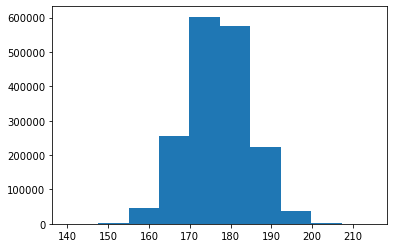

In [3]:
#np.random.normal(mean, standard deviation, size)

population = 1745643

heights = np.random.normal(177, 7.59, population)

plt.hist(heights);

#### Example 2 - Shoe sizes

Average shoe size is around 10 https://www.footsolutions.ie/blog/do-your-shoes-fit-average-foot-size-larger-than-ever-before/

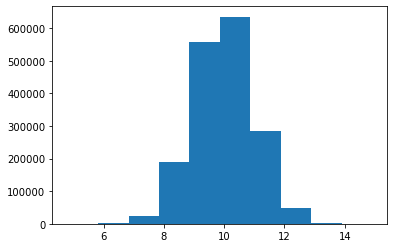

In [4]:
#np.random.normal(mean, standard deviation, size)
shoes = np.random.normal(10, 1, population)

plt.hist(shoes);

### Binomial Distribution 

https://www.mathsisfun.com/data/binomial-distribution.html
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html#numpy.random.binomial

Binomial distribution doesn't gave to be equal probability. 1 is often seen as the success value ie. The rarer outcome or outcome of interest. (from Practical Statistics for Data Science - https://www.oreilly.com/library/view/practical-statistics-for/9781491952955/)

example - coin toss, sales conversion, picking cards out of a deck

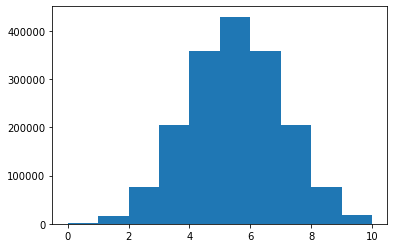

In [5]:

#np.random.binomial(number of trials, probability, size)
# Example 1 - Coin toss - ask every adult male in Ireland to flip a coin 10 times and record the result.

#1 = head, 0 = tail
rolls = np.random.binomial(10, 0.5, population)
plt.hist(rolls);

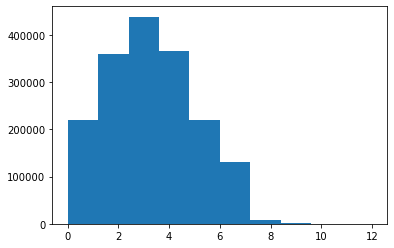

In [6]:

# Example 2 - Pick out 13 cards from a deck, and place it back. How many are hearts?

cards = np.random.binomial(13, 0.25, population)
plt.hist(cards);

### Poisson Distribution

Events are independent of each other. Average time between events is known, but the exact timing is random.

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.poisson.html#numpy.random.poisson
https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459

Examples - tickets received, cars driving past

(array([ 22.,  31., 231., 147., 167., 252.,  78.,  56.,  12.,   4.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

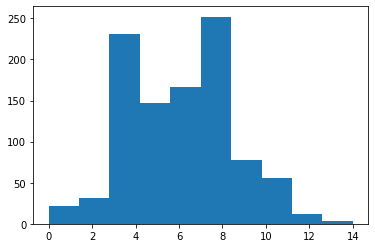

In [7]:
#numpy.random.poisson(lam, size)

# Example 1 - tickets received
# My team gets around 1000 tickets per week, which would mean a ticket every 5.9 mins on average

tickets = np.random.poisson(lam=5.9, size = 1000)

plt.hist(tickets)


### Exponential Distribution

Fewer large values, but more smaller values

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.exponential.html#numpy.random.exponential
https://courses.lumenlearning.com/introstats1/chapter/the-exponential-distribution/

examples - chat handle times, how long products last (e.g. how long until Keela loses a hair band)

### Geometric Distribution

The number of attempts until success. e.g. the number of times a die was rolled until you got a 6.

https://minisham.redbrick.dcu.ie/CA/Notes/CA266/10_Geometric_Distribution.pdf
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.geometric.html#numpy.random.geometric

examples - number of tickets solved until a csat was completed, videogame loot boxes

# Notes

# Seeding random numbers

Computers are deterministic, not random. therefore if we seed a specific starting point, we can take advantage of this. Quote from MIT article “if you ask the same question you’ll get the same answer every time.”

https://www.random.org/randomness/
https://engineering.mit.edu/engage/ask-an-engineer/can-a-computer-generate-a-truly-random-number/

Using a seed makes the code repeatable. Good for testing, sharing and teaching. Sharpsight article (https://www.sharpsightlabs.com/blog/numpy-random-seed/) mentions using for teaching. 

“When I do this, it’s important that people who read the tutorials and run the code get the same result. If a student reads the tutorial, and copy-and-pastes the code exactly, I want them to get the exact same result. This just helps them check their work! If they type in the code exactly as I show it in a tutorial, getting the exact same result gives them confidence that they ran the code properly.” 

“If you use a function from the numpy.random namespace (like np.random.randint, np.random.normal, etc) without using NumPy random see first, Python will actually still use numpy.random.seed in the background. NumPy will generate a seed value from a part of your computer system (like /urandom on a Unix or Linux machine).”



### What improvements come with PCG64?
How to seed PCG64?
numpy.random.default_rng(). Can also specify the old Mersenne Twiser algorithm by passinng MT19937 in the argument, e.g. numpy.random.default_rng(MT19937(42)
"Generator, besides being NumPy-aware, has the advantage that it provides a much larger number of probability distributions to choose from."
from - https://numpy.org/doc/stable/reference/random/generator.html

from https://numpy.org/doc/stable/reference/random/index.html
" PCG64 which has better statistical properties than the legacy MT19937"

How the seed is picked (MT algorithm)
https://numpy.org/doc/stable/reference/random/legacy.html
"If seed is None, then the MT19937 BitGenerator is initialized by reading data from /dev/urandom (or the Windows analogue) if available or seed from the clock otherwise."

More info on seeding - https://numpy.org/doc/stable/reference/random/parallel.html#seedsequence-spawn

"For example, MT19937 has a state consisting of 624 uint32 integers. A naive way to take a 32-bit integer seed would be to just set the last element of the state to the 32-bit seed and leave the rest 0s. This is a valid state for MT19937, but not a good one. The Mersenne Twister algorithm suffers if there are too many 0s. Similarly, two adjacent 32-bit integer seeds (i.e. 12345 and 12346) would produce very similar streams."

SeedSequence avoids these problems by using successions of integer hashes with good avalanche properties to ensure that flipping any bit in the input input has about a 50% chance of flipping any bit in the output. Two input seeds that are very close to each other will produce initial states that are very far from each other (with very high probability). It is also constructed in such a way that you can provide arbitrary-sized integers or lists of integers. SeedSequence will take all of the bits that you provide and mix them together to produce however many bits the consuming BitGenerator needs to initialize itself.

These properties together mean that we can safely mix together the usual user-provided seed with simple incrementing counters to get BitGenerator states that are (to very high probability) independent of each other. We can wrap this together into an API that is easy to use and difficult to misuse.

avalanche effect - https://en.wikipedia.org/wiki/Avalanche_effect

https://numpy.org/doc/stable/reference/random/performance.html

"The recommended generator for general use is PCG64. It is statistically high quality, full-featured, and fast on most platforms, but somewhat slow when compiled for 32-bit processes."

"MT19937 fails some statistical tests (https://www.iro.umontreal.ca/~lecuyer/myftp/papers/testu01.pdf) and is not especially fast compared to modern PRNGs. For these reasons, we mostly do not recommend using it on its own, only through the legacy RandomState for reproducing old results. That said, it has a very long history as a default in many systems."

" The original MT19937 generator is much slower since it requires 2 32-bit values to equal the output of the faster generators."

![here](https://screenshot.click/09_51-97cot-1j3zc.jpg)

https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64






References 

[1] https://www.nature.com/articles/s41586-020-2649-2
[2] https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html
[3] https://stackoverflow.com/a/43838531
[4] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice
[5] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle
[6] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation
[7] https://statisticsbyjim.com/hypothesis-testing/bootstrapping/
[8] https://numpy.org/doc/stable/reference/random/index.html
[9] https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64
[10] https://engineering.mit.edu/engage/ask-an-engineer/can-a-computer-generate-a-truly-random-number/
[11] https://www.iro.umontreal.ca/~lecuyer/myftp/papers/testu01.pdf
[12] https://www.cs.hmc.edu/tr/hmc-cs-2014-0905.pdf
[13] https://numpy.org/doc/stable/reference/random/bit_generators/index.html#seeding-and-entropy
[14] https://hackaday.com/2017/11/02/what-is-entropy-and-how-do-i-get-more-of-it/
[15] https://www.sharpsightlabs.com/blog/numpy-random-seed/
[16] https://numpy.org/doc/stable/reference/random/parallel.html#seedsequence-spawn
[17] https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html
[18] https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng
[19] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers
[20] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random
[21] https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes
[22]

https://zkf85.github.io/2019/01/31/np-shuffle-vs-permutation
https://www.w3schools.com/python/numpy_random_permutation.asp
https://www.random.org/randomness/
https://www.sharpsightlabs.com/blog/numpy-random-seed/
 https://numpy.org/doc/stable/reference/random/index.html https://numpy.org/doc/stable/reference/random/new-or-different.html#new-or-different https://www.sharpsightlabs.com/blog/numpy-random-seed/ https://medium.com/@debanjana.bhattacharyya9818/numpy-random-seed-101-explained-2e96ee3fd90b
 https://iopscience.iop.org/article/10.3847/1538-4357/aaf103 
 https://towardsdatascience.com/probability-concepts-explained-probability-distributions-introduction-part-3-4a5db81858dc